# Comparision of assemblied isoforms

This notebook compare the assemblied isoforms and known isoforms.

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Single-cell assembled isoforms

In [2]:
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_csv("../../1_FLAIRseq/reports/NanoNASCseq_Summary.tsv", sep="\t")
d = d[[run in runs for run in d["Run"]]]
d = d[d["UMIs"] >= 5000]
print("Cells:", len(d))

Cells: 426


In [3]:
names = [
    'full-splice_match', 
    'incomplete-splice_match', 
    'novel_in_catalog', 
    'novel_not_in_catalog',
    'antisense', 
    'fusion', 
    'genic', 
    'intergenic'
]

rows = []
for cell in d["Cell"]:
    path = "../../1_FLAIRseq/results/assembly/sqanti3/%s/%s/%s_classification.filtered_lite_classification.txt" % (cell.split(".")[0], cell, cell)
    tmp = pd.read_csv(path, sep="\t")
    counter = Counter(tmp["structural_category"])
    rows.append([counter[name] for name in names])
dat = pd.DataFrame(rows)
dat.columns = ["FSM", "ISM", "NIC", "NNC", "AntiSense", "Fusion", "Genic", "Intergenic"]

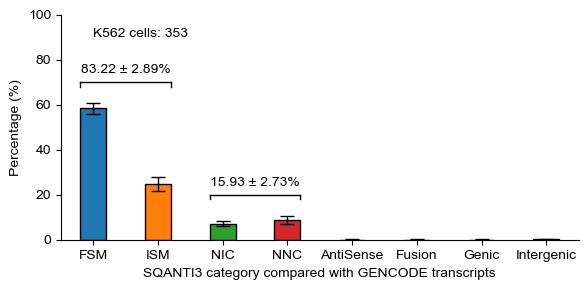

In [4]:
dat1 = dat[dat.sum(axis=1) > 2000]
dat2 = dat1.divide(dat1.sum(axis=1), axis=0) * 100
vs1 = dat2["FSM"] + dat2["ISM"]
vs2 = dat2["NIC"] + dat2["NNC"]

ys = dat2.mean(axis=0)
yerr = dat2.std(axis=0)
xs = np.arange(len(ys))

colors = ["C0", "C1", "C2", "C3", "C7", "C7", "C7", "C7"]
plt.figure(figsize=(6, 3))
# plt.title("SQANTI3 category compared with GENCODE transcripts")

plt.bar(xs, ys, yerr=yerr, width=0.4, color=colors, edgecolor="black", error_kw={"capsize": 5, "lw": 1})
plt.text(0, 90, "K562 cells: %d" % len(dat2))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylim(0, 100)

x1, x2 = 0 - 0.2, 1 + 0.2
y = 70
plt.plot([x1, x2], [y, y], lw=1, color="black")
plt.plot([x1, x1], [y - 2, y], lw=1, color="black")
plt.plot([x2, x2], [y - 2, y], lw=1, color="black")
plt.text((x1 + x2) / 2, y + 4, "%.2f ± %.2f%%" % (np.mean(vs1), np.std(vs1)), ha="center")

x1, x2 = 2 - 0.2, 3 + 0.2
y = 20
plt.plot([x1, x2], [y, y], lw=1, color="black")
plt.plot([x1, x1], [y - 2, y], lw=1, color="black")
plt.plot([x2, x2], [y - 2, y], lw=1, color="black")
plt.text((x1 + x2) / 2, y + 4, "%.2f ± %.2f%%" % (np.mean(vs2), np.std(vs2)), ha="center")

plt.xticks(xs, dat2.columns, rotation=0)
plt.xlabel("SQANTI3 category compared with GENCODE transcripts")
plt.ylabel("Percentage (%)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("figures/sqanti3_summary.pdf")

## 2. Merged isoforms

In [5]:
rows = []
path = "../../1_FLAIRseq/results/assembly/tama/sqanti3/K562/K562_classification.filtered_lite_classification.txt"
tmp = pd.read_csv(path, sep="\t")
counter = Counter(tmp["structural_category"])
rows.append([counter[name] for name in names])
dat = pd.DataFrame(rows)
dat.columns = ["FSM", "ISM", "NIC", "NNC", "AntiSense", "Fusion", "Genic", "Intergenic"]

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


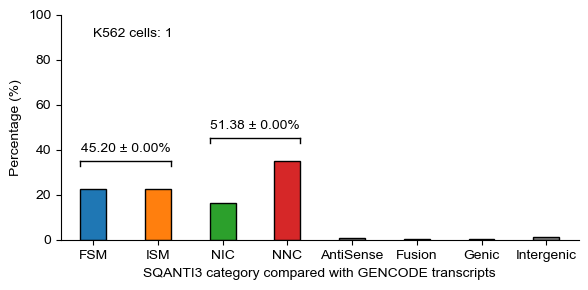

In [6]:
dat1 = dat[dat.sum(axis=1) > 2000]
dat2 = dat1.divide(dat1.sum(axis=1), axis=0) * 100
vs1 = dat2["FSM"] + dat2["ISM"]
vs2 = dat2["NIC"] + dat2["NNC"]

ys = dat2.mean(axis=0)
yerr = dat2.std(axis=0)
xs = np.arange(len(ys))

colors = ["C0", "C1", "C2", "C3", "C7", "C7", "C7", "C7"]
plt.figure(figsize=(6, 3))
# plt.title("SQANTI3 category compared with GENCODE transcripts")

plt.bar(xs, ys, yerr=yerr, width=0.4, color=colors, edgecolor="black", error_kw={"capsize": 5, "lw": 1})
plt.text(0, 90, "K562 cells: %d" % len(dat2))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylim(0, 100)

x1, x2 = 0 - 0.2, 1 + 0.2
y = 35
plt.plot([x1, x2], [y, y], lw=1, color="black")
plt.plot([x1, x1], [y - 2, y], lw=1, color="black")
plt.plot([x2, x2], [y - 2, y], lw=1, color="black")
plt.text((x1 + x2) / 2, y + 4, "%.2f ± %.2f%%" % (np.mean(vs1), np.std(vs1)), ha="center")

x1, x2 = 2 - 0.2, 3 + 0.2
y = 45
plt.plot([x1, x2], [y, y], lw=1, color="black")
plt.plot([x1, x1], [y - 2, y], lw=1, color="black")
plt.plot([x2, x2], [y - 2, y], lw=1, color="black")
plt.text((x1 + x2) / 2, y + 4, "%.2f ± %.2f%%" % (np.mean(vs2), np.std(vs2)), ha="center")

plt.xticks(xs, dat2.columns, rotation=0)
plt.xlabel("SQANTI3 category compared with GENCODE transcripts")
plt.ylabel("Percentage (%)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
# plt.savefig("figures/sqanti3_summary.pdf", dpi=300)